# 25/04 - Pair Programming Visualización 1 - Tatiana & Lara

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [17]:
df = pd.read_csv("datos_guardados.csv")
df.head()

,Unnamed: 0,unnamed:_0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,1,1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2,2,2018.06.09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
3,3,3,2018.06.08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...
4,4,4,2018.06.04,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,"Tiger shark, 3m",http://sharkattackfile.net/spreadsheets/pdf_di...


# Ejercicio 1
¿Cuál es la frecuencia de cada una de las categorías de la columna sex?


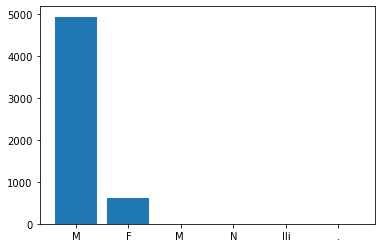

In [18]:
# Valores únicos, contarlos, hacer una gráfica que muestre la frecuencia de M / F / otros
freq = df["sex_"].value_counts()
freq = freq.reset_index()# aca lo convertimos en dataframe

plt.figure()
x= freq["index"]
y= freq["sex_"]

plt.bar(x,y)
plt.show()



# Ejercicio 2
¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación.


<function matplotlib.pyplot.show(close=None, block=None)>

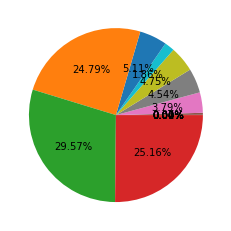

In [19]:
nulos = df.isnull().sum()
total = df.shape[0]
porc = nulos / total * 100

plt.figure()
plt.pie(porc, autopct='%1.2f%%')
plt.show

# Ejercicio 3
¿Cuál es número total de valores únicos de cada una de las columnas categóricas del dataframe?


In [20]:
df.describe(include="object").T #usamos include object para decirle q solo las categoricas, Ponemos T solo para verlo mejor (nos pone vertical)

,count,unique,top,freq
case_number,6113,6113,2018.06.25,1
type,6110,8,Unprovoked,4438
country,6074,201,USA,2200
area,5706,791,Florida,1025
location,5626,4020,"New Smyrna Beach, Volusia County",162
activity,5603,1484,Surfing,966
name,5914,5118,male,511
sex_,5564,6,M,4939
age,3448,156,17,154
time,2934,366,Afternoon,183


# Ejercicio 4
Filtrad los datos para quedarnos solo con los datos de USA.
¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

Index(['index', 'year'], dtype='object')


<function matplotlib.pyplot.show(close=None, block=None)>

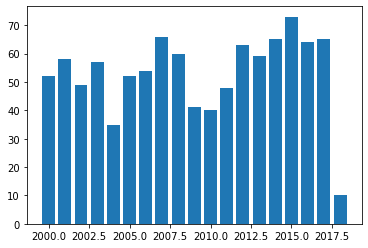

In [38]:
USA = df[(df["country"] == "USA") & (df["year"] >= 2000)]
USA_2000_c = USA["year"].value_counts()
USA_2000_df = USA_2000_c.reset_index() # aca lo convertimos en dataframe
print(USA_2000_df.columns)

plt.figure()
x= USA_2000_df["index"]
y= USA_2000_df["year"]
plt.bar(x,y)
plt.show


En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en USA? Muestra los resultados en un gráfico de línea.

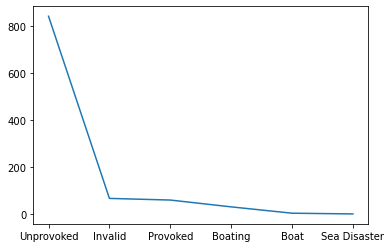

In [7]:
usa_types = USA["type"].value_counts().reset_index()

plt.figure()
x = usa_types["index"]
y = usa_types["type"]
plt.plot(x, y)
plt.show()

# Ejercicio 5
¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [40]:
spain = df[df["country"] == "SPAIN"]
spain2000 = df[(df["country"] == "SPAIN") & (df["year"] >= 2000)].value_counts().reset_index()# aca lo convertimos en dataframe
spain2000


,Unnamed: 0,unnamed:_0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,0
0,98,98,2017.08.26.b,2017.0,Invalid,SPAIN,CastellÃ³n,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,http://sharkattackfile.net/spreadsheets/pdf_di...,1
1,233,234,2016.07.29,2016.0,Unprovoked,SPAIN,Alicante Province,Arenales del Sol,Swimming,male,M,40,11h30,Blue shark,http://sharkattackfile.net/spreadsheets/pdf_di...,1
2,377,378,2015.08.18.a,2015.0,Invalid,SPAIN,Alicante,"Poniente Beach, Benidorm",Swimming,male,M,10,11h00,Shark involvement not confirmed,http://sharkattackfile.net/spreadsheets/pdf_di...,1
3,1007,1011,2010.07.16.b,2010.0,Provoked,SPAIN,Grand Canary Island,"Sardina del Norte, GÃ¡ldar",Swimming,male,M,9,19h15,Angel shark,http://sharkattackfile.net/spreadsheets/pdf_di...,1


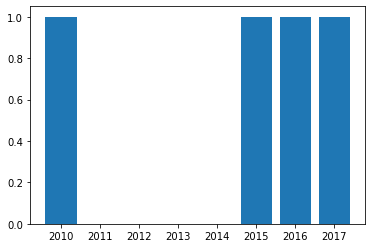

In [42]:
plt.figure()
x = spain2000["year"]
y = spain2000["case_number"].value_counts()

plt.bar(x, y)
plt.show()

En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

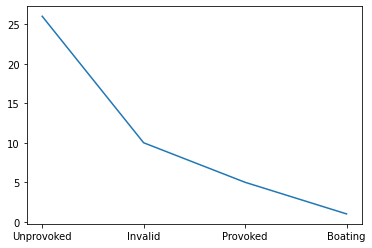

In [9]:
spain_types = spain["type"].value_counts().reset_index() # aca lo convertimos en dataframe
plt.figure()

x= spain_types["index"]
y=spain_types["type"]

plt.plot(x, y)
plt.show()